In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


df_cleaned =df_cleaned.set_index('Date')
df_cleaned.index = pd.to_datetime(df_cleaned.index)

In [2]:
df = pd.read_csv('australia.csv')
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Duplicates

In [5]:
df.duplicated().sum()

0

### Data Cleaning

***Observations:*** If Some of the features on this data set have high null values, I will drop the columns that have more than 10% of Null values. Even if I were to treat these values, I feel I would be distorting the information too much and might impact the accuracy of my ML model when implemented

***Observations:*** I think addressing the high cardinality of some of these categorical variables can be troublesome to Encode. The only two variables that might look good to encode will be RainToday and the target variable RainTomorrow 

In [6]:
def nulls_cardinality_imputation(df):
    for i in df.columns:
       #Null
        if ((df[i].isnull().sum() / df.shape[0]) *100 )> 10:

            df = df.drop(columns= [i], axis= 1)
            
            print(f'{i} was dropped, it had more than 10%')
            continue
           
        #Uniqueness
        if df[i].dtypes == 'object':

            print(f'{i} has {df[i].nunique()}, unique values')
            continue
           
        #Imputation
        if df[i].dtypes == 'float64':

            df[i].fillna(df[i].mean(), inplace=True)
            
        
        else:

            df[i].fillna(df[i].mode(), inplace = True)
            
            
            continue
    return df

                                 
                                 

In [7]:
df_cleaned = nulls_cardinality_imputation(df)


Date has 3436, unique values
Location has 49, unique values
Evaporation was dropped, it had more than 10%
Sunshine was dropped, it had more than 10%
WindGustDir has 16, unique values
WindDir9am has 16, unique values
WindDir3pm has 16, unique values
Pressure9am was dropped, it had more than 10%
Pressure3pm was dropped, it had more than 10%
Cloud9am was dropped, it had more than 10%
Cloud3pm was dropped, it had more than 10%
RainToday has 2, unique values
RainTomorrow has 2, unique values


In [8]:
df_cleaned['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [9]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Temp9am        145460 non-null  float64
 14  Temp3pm        145460 non-null  float64
 15  RainToday      142199 non-null  object 
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(10), object(7)
mem

Target Variable encoding

In [10]:
df_cleaned['RainTomorrow'] =  df_cleaned['RainTomorrow'].map({'No':0,'Yes':1})
df_cleaned['RainToday'] =  df_cleaned['RainToday'].map({'No':0, 'Yes':1})

In [11]:
df_cleaned['RainToday'].value_counts()

0.0    110319
1.0     31880
Name: RainToday, dtype: int64

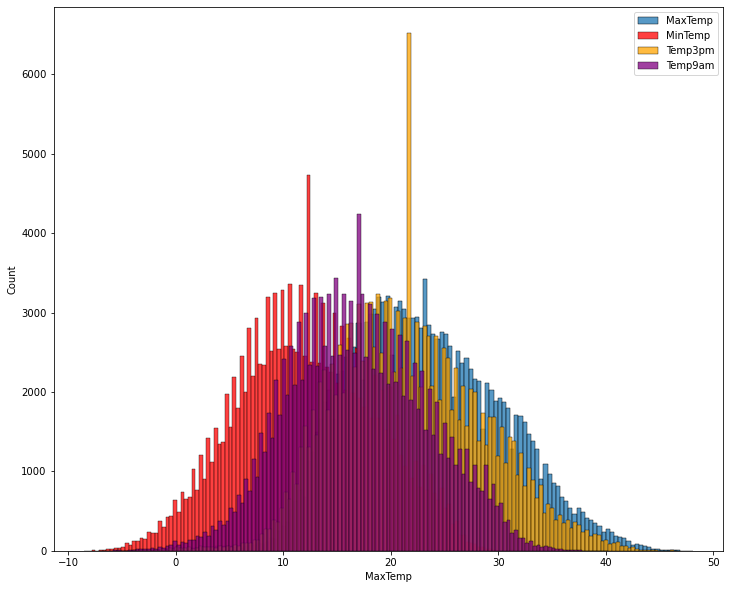

In [12]:
plt.figure(figsize=(12,10))
sns.histplot(df_cleaned['MaxTemp']),
sns.histplot(df_cleaned['MinTemp'], color='red'),
sns.histplot(df_cleaned['Temp3pm'], color='orange'),
sns.histplot(df_cleaned['Temp9am'],color='purple')
plt.legend(df[['MaxTemp', 'MinTemp','Temp3pm', 'Temp9am']])
plt.show();

<AxesSubplot:xlabel='Location'>

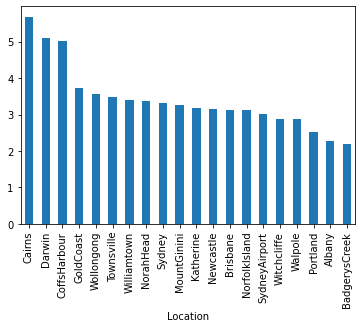

In [13]:
df_cleaned.groupby(['Location'])['Rainfall'].mean().sort_values(ascending= False).iloc[:20].plot(kind='bar')


In [14]:
df_cleaned.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,142199.000000,142193.000000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,16.990631,21.683390,0.224193,0.224181
std,6.365750,7.088124,8.382488,13.118253,8.861059,8.716581,18.854765,20.471189,6.449221,6.850057,0.417051,0.417043
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,12.300000,16.700000,0.000000,0.000000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,18.662657,69.000000,51.539116,16.800000,21.400000,0.000000,0.000000
75%,16.800000,28.200000,1.000000,46.000000,19.000000,24.000000,83.000000,65.000000,21.500000,26.200000,0.000000,0.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,40.200000,46.700000,1.000000,1.000000


In [15]:
for i in df_cleaned.columns:
    if df[i].dtypes == 'object':

            print(f'{i} has {df[i].nunique()}, unique values')
            continue
           

Date has 3436, unique values
Location has 49, unique values
WindGustDir has 16, unique values
WindDir9am has 16, unique values
WindDir3pm has 16, unique values
RainToday has 2, unique values
RainTomorrow has 2, unique values


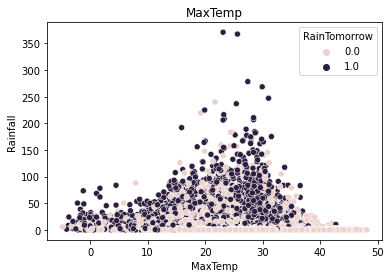

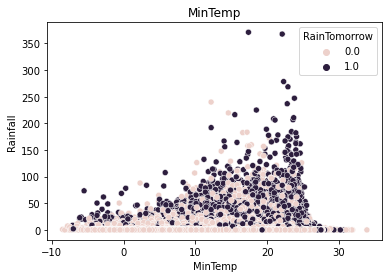

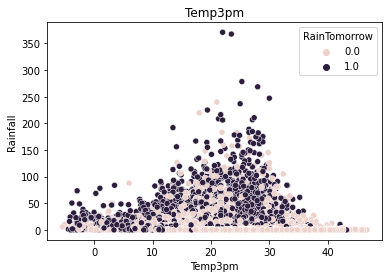

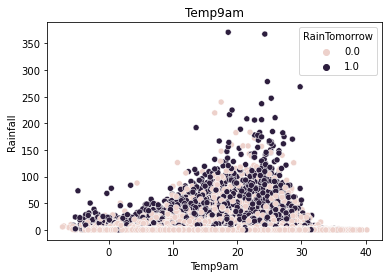

In [16]:
list = ['MaxTemp', 'MinTemp','Temp3pm', 'Temp9am']
for i in list:
    sns.scatterplot(x=df_cleaned[i], y = df_cleaned['Rainfall'], hue= df_cleaned['RainTomorrow'])
    plt.title(i)
    plt.show()

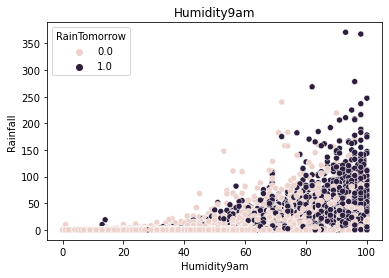

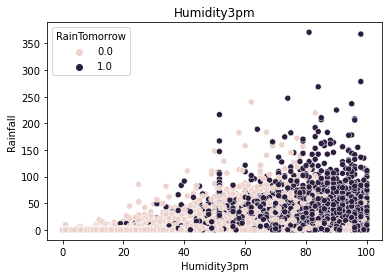

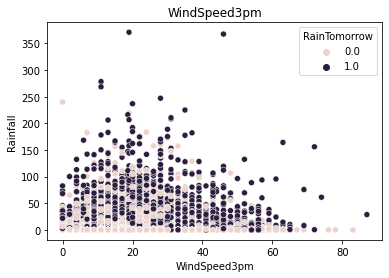

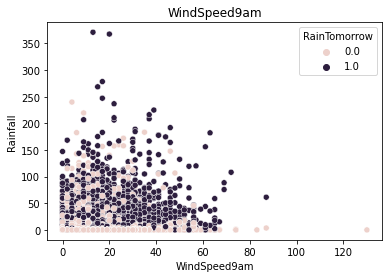

In [17]:
list = ['Humidity9am', 'Humidity3pm','WindSpeed3pm', 'WindSpeed9am']
for i in list:
    sns.scatterplot(x=df_cleaned[i], y = df_cleaned['Rainfall'], hue= df_cleaned['RainTomorrow'])
    plt.title(i)
    plt.show()

I think I can take the average of the temperature, humidity and windspeed to further understand the overall behavior of the weather metrics

In [18]:
df_cleaned['AvgTemp(3am-9pm)'] = (df_cleaned['Temp9am'] + df_cleaned['Temp3pm']) / 2 
df_cleaned = df_cleaned.drop(columns =['Temp9am','Temp3pm'], axis = 1)
df_cleaned.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,AvgTemp(3am-9pm)
0,12/1/2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,0.0,0.0,19.35


In [19]:
df_cleaned['AvgTemp'] = (df_cleaned['MinTemp'] + df_cleaned['MaxTemp']) / 2 
df_cleaned = df_cleaned.drop(columns =['MinTemp','MaxTemp'], axis = 1)
df_cleaned.head(1)

,Date,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,AvgTemp(3am-9pm),AvgTemp
0,12/1/2008,Albury,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,0.0,0.0,19.35,18.15


In [20]:
df_cleaned['AvgDayWind'] = (df_cleaned['WindSpeed9am'] + df_cleaned['WindSpeed3pm']) / 2 
df_cleaned = df_cleaned.drop(columns =['WindSpeed9am','WindSpeed3pm'], axis = 1)
df_cleaned.head(1)

,Date,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,AvgTemp(3am-9pm),AvgTemp,AvgDayWind
0,12/1/2008,Albury,0.6,W,44.0,W,WNW,71.0,22.0,0.0,0.0,19.35,18.15,22.0


In [21]:
df_cleaned['AvgDayHumid'] = (df_cleaned['Humidity9am'] + df_cleaned['Humidity3pm']) / 2 
df_cleaned = df_cleaned.drop(columns =['Humidity9am','Humidity3pm'], axis = 1)
df_cleaned.head(1)

,Date,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,AvgTemp(3am-9pm),AvgTemp,AvgDayWind,AvgDayHumid
0,12/1/2008,Albury,0.6,W,44.0,W,WNW,0.0,0.0,19.35,18.15,22.0,46.5


Correlation

<AxesSubplot:>

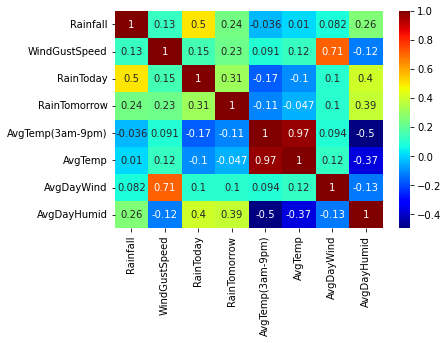

In [22]:
corr_mat = df_cleaned.corr()
sns.heatmap(corr_mat, cmap = 'jet', annot = True)

Fromt he correlation matrix we can conclude that there is no multicollinearity other than Gust speed with it's average and Avg Temp with the tempeture from 9am and 3 pm 

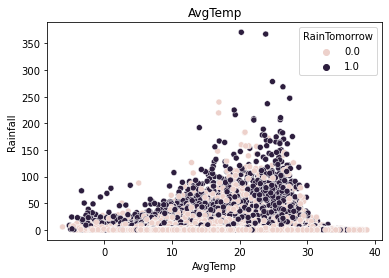

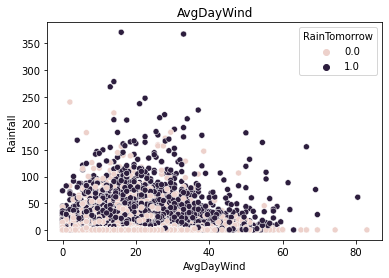

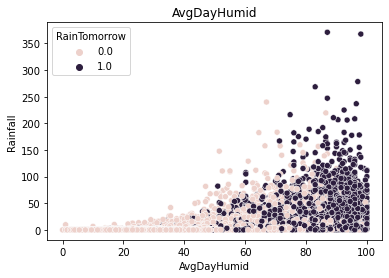

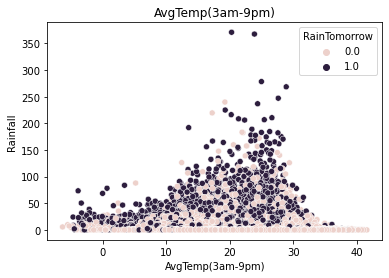

In [23]:
list = ['AvgTemp', 'AvgDayWind','AvgDayHumid','AvgTemp(3am-9pm)']
for i in list:
    sns.scatterplot(x=df_cleaned[i], y = df_cleaned['Rainfall'], hue= df_cleaned['RainTomorrow'])
    plt.title(i)
    plt.show()

Looks like taking the average did not have a significant impact on the vizual aspect of the data point for each weather metric(WindSpeed, Temperature and Humidity)

In [24]:
df_cleaned.head(1)

,Date,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,AvgTemp(3am-9pm),AvgTemp,AvgDayWind,AvgDayHumid
0,12/1/2008,Albury,0.6,W,44.0,W,WNW,0.0,0.0,19.35,18.15,22.0,46.5


In [25]:
df_cleaned.columns

Index(['Date', 'Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow',
       'AvgTemp(3am-9pm)', 'AvgTemp', 'AvgDayWind', 'AvgDayHumid'],
      dtype='object')

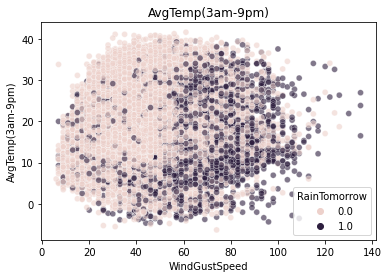

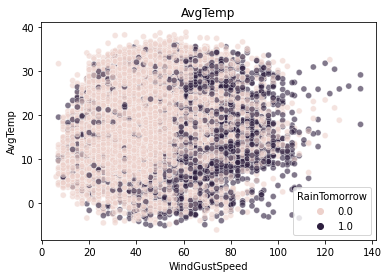

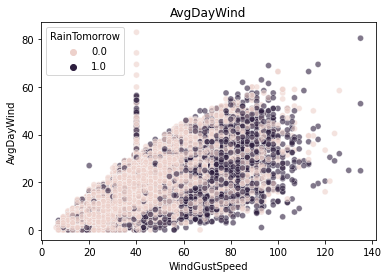

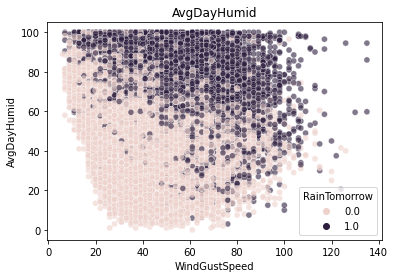

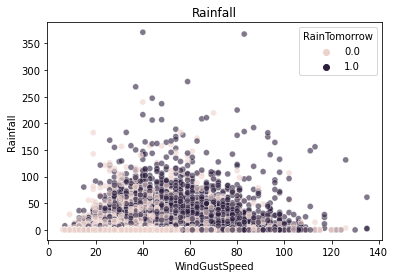

In [26]:
list2 = ['AvgTemp(3am-9pm)', 'AvgTemp', 'AvgDayWind', 'AvgDayHumid', 'Rainfall']
for i in list2:

    sns.scatterplot(data=df_cleaned, x = df_cleaned['WindGustSpeed'], y = df_cleaned[i], hue=df_cleaned['RainTomorrow'], alpha=.6)
    plt.title(i)
    plt.show();

From looking at the averages from wind, temperature and humidity we can say that the windspeed at different times of the day may only change slightly so I believe we can keep the most powerful gust of winds and the encode it

In [27]:
df_cleaned = df_cleaned.drop(columns=['WindDir9am', 'WindDir3pm'], axis= 1)
df_cleaned.head(1)

,Date,Location,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,AvgTemp(3am-9pm),AvgTemp,AvgDayWind,AvgDayHumid
0,12/1/2008,Albury,0.6,W,44.0,0.0,0.0,19.35,18.15,22.0,46.5


In [28]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['WindGustDir'], dtype=int)

For our machine larning model, we should be able to predict if it will rain or not based on the weather metrics and not what city or even the date so I will drop those two columns for now. We can further investigate them independently to forecast if it will rain or not

In [29]:
df_cleaned = df_cleaned.drop(columns = ['Date','Location'], axis = 1)
df_cleaned.head(1)

,Rainfall,WindGustSpeed,RainToday,RainTomorrow,AvgTemp(3am-9pm),AvgTemp,AvgDayWind,AvgDayHumid,WindGustDir_E,WindGustDir_ENE,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0.6,44.0,0.0,0.0,19.35,18.15,22.0,46.5,0,0,...,0,0,0,0,0,0,0,1,0,0


Target Variable Balance

<AxesSubplot:>

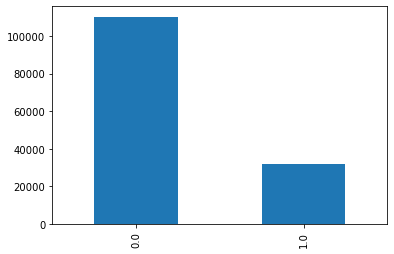

In [30]:
df_cleaned['RainTomorrow'].value_counts().plot(kind ='bar')

In [31]:
df_cleaned.shape

(145460, 24)

In [32]:
df_cleaned_ = df_cleaned.dropna()
df_cleaned_.shape

(140787, 24)

In [33]:
from imblearn.over_sampling import SMOTE

X =  df_cleaned_.drop(columns = 'RainTomorrow', axis = 1)
Y =  df_cleaned_['RainTomorrow'] 


smote = SMOTE()

X_resampled, Y_resampled =  smote.fit_resample(X,Y)

Logistics Regression

I first would like to standarized the data 

In [34]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform((X_resampled))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data_scaled, Y_resampled, random_state = 42)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = log_reg.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [37]:
score = log_reg.score(X_test, y_test)
print(score)

0.8460752285875933


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[23849,  3394],
       [ 5040, 22510]], dtype=int64)

In [39]:
from sklearn.metrics import recall_score, precision_score
pr_sc = precision_score(y_test, y_pred)
rec_sc = recall_score(y_test,y_pred)

print('Precision Score:',pr_sc*100),
print('Recall Score:',rec_sc*100)

Precision Score: 86.89777640518838
Recall Score: 81.7059891107078


In [40]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.8422194784300518

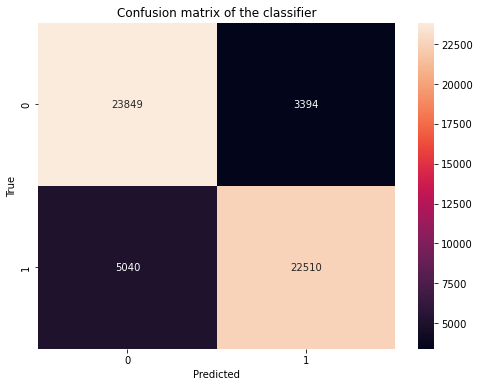

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_pred' are your predicted classes
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


From these results we see that our model is working with satisfactory number, the proportion of Type I error is of 6% and Type II  of 9%  out of 54793 data points 

Checking our models accuracy using cross validation score

In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_reg,X_train, y_train, cv = 5, scoring= 'accuracy')

array([0.8484913 , 0.84721377, 0.8455104 , 0.84560165, 0.84897338])

Double checking our model is indeed this accurate by creating a dummy classifier

In [43]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train)
print(any(dummy_clf.predict(X_train)))

False


In [44]:
cross_val_score(dummy_clf, X_train,y_train, cv= 3, scoring='accuracy')

array([0.5009399 , 0.5009399 , 0.50092165])

This result is somewhat redudant because our data was balanced Using SMOTE, the dummy classifer is getting the most frequent result from the target variable. That is why it is giving us a 50% accuracy.

Using The cross Validation Predict

In [45]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg, X_train,y_train, cv= 5)


Lets use metrics to check accuracy

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[72106, 10237],
       [14887, 67149]], dtype=int64)

In [47]:
from sklearn.metrics import recall_score, precision_score
pr_sc = precision_score(y_train, y_train_pred)
rec_sc = recall_score(y_train,y_train_pred)

print('Precision Score:',pr_sc*100),
print('Recall Score:',rec_sc*100)

Precision Score: 86.77150905848603
Recall Score: 81.85308888780536


In [48]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)


0.8424056905571377

Recall and Precision analysis

In [49]:
y_scores = cross_val_predict(log_reg, X_train,y_train,cv= 5, method ='decision_function')

In [50]:
from sklearn.metrics  import precision_recall_curve

precisions, recalls,thresholds = precision_recall_curve(y_train,y_scores)

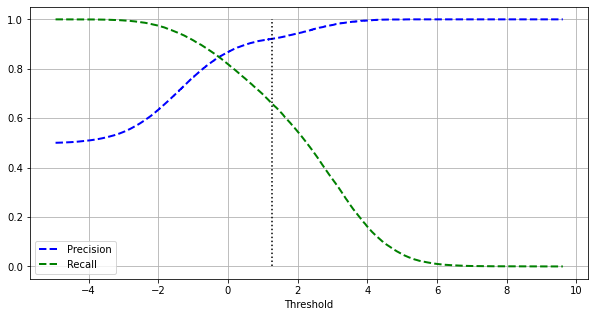

In [51]:
plt.figure(figsize =(10,5))
plt.plot(thresholds,precisions[:-1], 'b--',label='Precision', linewidth = 2)
plt.plot(thresholds,recalls[:-1],'g--',label ='Recall', linewidth = 2)
plt.vlines(1.25,0,1.0,'k','dotted',label='Threshold')
plt.legend(['Precision','Recall'])
plt.xlabel('Threshold')
plt.grid()
plt.show();

we see that if we move the threshhold because we want higher precision, we risk losing recall as well

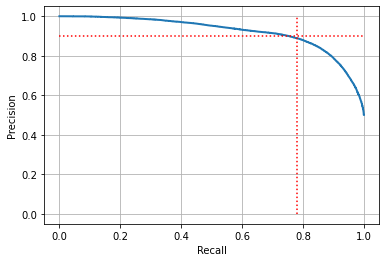

In [52]:
plt.plot(recalls,precisions,linewidth = 2, label = 'Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.hlines(.90, 0,1,'red','dotted')
plt.vlines(.78,0,1,'red','dotted')
plt.grid()
plt.show()

if we want a precision of 90 percent we would have about a 78 percent recall.. It depends on the experts on the field to evaluate if they want to tune Precision/Recall

Hyperparameter Tuning

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # only these solvers support both l1 and l2
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.85


Final Model

In [56]:
from sklearn.metrics import accuracy_score

final_model = LogisticRegression( C = 1, penalty= 'l1', solver= 'saga')
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) *100
print(f'The Test accuracy is of: {accuracy}%')

The Test accuracy is of: 84.6129980106948%
